This statistics/data anylsis project will be focused on discovering how factors of society determine suicide, and how countries can work on lowering their suicide rate. 

In [136]:
#Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
sns.set_theme()
print("Imported libraries!")

Imported libraries!


The file incomedeath.csv includes data on the suicides, alchohol consumption, emplyoment, and income of countries around the world. Understand the correlation between some of those variables will be helpful in trying to understand how society affects suicide. 

In [2]:
#Read csv file and remove NaN
incomedeath = pd.read_csv('incomedeath.csv')
incomedeath = incomedeath.dropna()
print(incomedeath.isnull().sum())

#Collect relevant data 
country = np.array(incomedeath['country'])
suicide = np.array(incomedeath['suicideper100th'])
alchohol = np.array(incomedeath['alcconsumption'])
employment = np.array(incomedeath['employrate'])

country            0
alcconsumption     0
incomeperperson    0
suicideper100th    0
employrate         0
urbanrate          0
dtype: int64


Simply based on the suicide and alchohol rate, we can preform some basic data analysis 

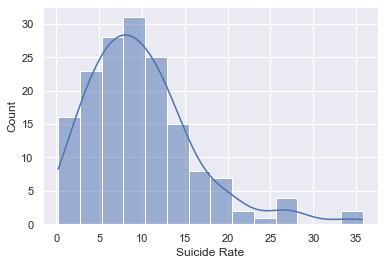

In [7]:
sns.histplot(suicide, kde=True)
plt.xlabel('Suicide Rate')
plt.show()

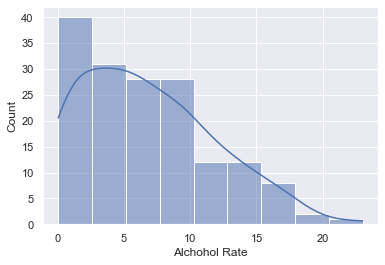

In [9]:
sns.histplot(alchohol, kde=True)
plt.xlabel('Alchohol Rate')
plt.show()

In [15]:
#Find countries with least and most suicide rates

incomedeath_sorted = np.array(incomedeath.sort_values('suicideper100th')['country'])
print(incomedeath_sorted[:10]) #Least
print(incomedeath_sorted[-10:]) #Most

#Find countries with most and least alchohol rates

incomedeath_sorted = np.array(incomedeath.sort_values('alcconsumption')['country'])
print(incomedeath_sorted[:10]) #Least
print(incomedeath_sorted[-10:]) #Most

['Jordan' 'Syria' 'Brunei' 'Azerbaijan' 'United Arab Emirates' 'Haiti'
 'Georgia' 'Peru' 'Egypt' 'Philippines']
['Latvia' 'Suriname' 'Korea, Rep.' 'Kazakhstan' 'Laos' 'Belarus' 'Russia'
 'Sri Lanka' 'Lithuania' 'Guyana']
['Pakistan' 'Libya' 'Mauritania' 'Bangladesh' 'Yemen, Rep.' 'Comoros'
 'Egypt' 'Niger' 'Saudi Arabia' 'Iraq']
['Romania' 'Russia' 'Lithuania' 'Uganda' 'Czech Rep.' 'Estonia' 'Ukraine'
 'Belarus' 'Korea, Rep.' 'Moldova']


In order to examine the effects of where someone lives and their likelihood of suicide, we can examine the amount of suicides per region on Earth. 

In [90]:
#Get data on a csv file which maps each country to a region

country2region = pd.read_csv('country2region.csv')
country2region = country2region.sort_values('country')
country2region = country2region.merge(incomedeath, left_on='country', right_on='country')
print(country2region.isnull().sum())

country            0
region             0
subregion          0
alcconsumption     0
incomeperperson    0
suicideper100th    0
employrate         0
urbanrate          0
dtype: int64


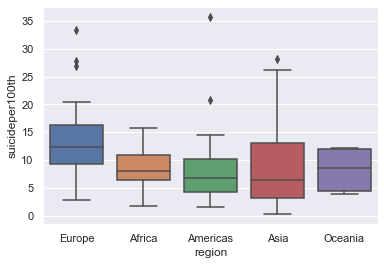

In [86]:
sns.boxplot(x='region', y='suicideper100th', data=country2region)
plt.show()

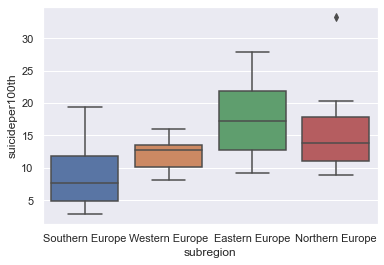

In [87]:
#Explore the relationship in only Europe

country2region_ = country2region[country2region['region'] == 'Europe']

sns.boxplot(x='subregion', y='suicideper100th', data=country2region_)
plt.show()

A correlation matrix can be made between every factor in incomedeath.csv can be calculated in order to spot unique features that may have a high correlation. 

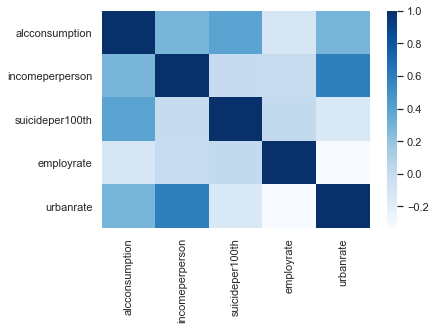

In [67]:
df_matrix = df.drop('country', axis=1)
sns.heatmap(df_matrix.corr(), cmap='Blues')
plt.show()

Out of the correlation matrix, pairs of variables such as alchohol-urbanization, urbanization-income, and alchohol-suicide appear to correlate. Further anaylsis can be applied on some of these variables to get the full info on them. 

In [20]:
#Make functions to calculate the correlation between two populations

def covariance(a, b):
    num = sum([((a[i] - np.mean(a)) * (b[i] - np.mean(b))) for i in range(len(a))])
    dem = len(a)
    return num / dem

def correlation(a, b):
    num = covariance(a, b)
    dem = np.std(a) * np.std(b)
    return num / dem

print(correlation([1, 2, 4, 5, 8], [5, 20, 40, 80, 100]))

0.9684133966182731


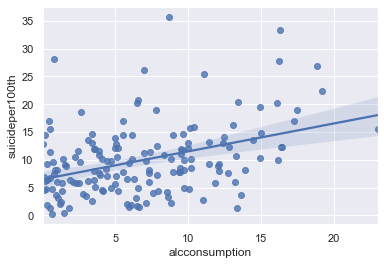

0.39646253810589904


In [57]:
sns.regplot(x='alcconsumption', y='suicideper100th', data=df)
plt.show()
print(correlation(alchohol, suicide))

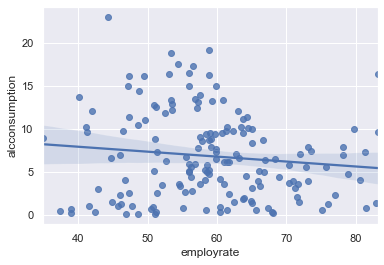

-0.118889517968538


In [58]:
sns.regplot(x='employrate', y='alcconsumption', data=df)
plt.show()
print(correlation(employment, alchohol))

In order to get the full picture of how the data correlates with suicide rates, a Linear Regression model can be applied. 

In [80]:
X = np.array(incomedeath.drop(['country', 'suicideper100th'], axis=1))
model = LinearRegression()
scores = cross_val_score(model, X, suicide, cv=5)
print(scores.mean(), scores.std())

0.13057303675442797 0.08381225412339972


A big factor to the well being of a country is the country's economic freedom. The economic freedom index represents the ability of citizens within a country to manage their own labor and property. Countries with high economic freedom allow their citizens to make their own financial decisions. We can explore the correlation of these factors. 

In [67]:
#Get data on economic freedom

freedom = pd.read_csv('freedom.csv')[['country', 'Freedom']]
freedom = freedom.dropna()
freedom = freedom.sort_values('country')

#Merge incomedeath and freedom for further data anaylsis 

freedom = freedom.merge(incomedeath, left_on='country', right_on='country')

print(freedom.isnull().sum())

country            0
Freedom            0
alcconsumption     0
incomeperperson    0
suicideper100th    0
employrate         0
urbanrate          0
dtype: int64


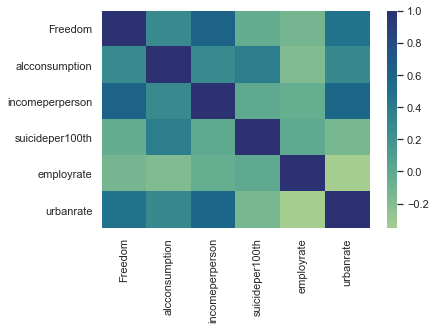

In [27]:
freedom_matrix = freedom.drop('country', axis=1)
sns.heatmap(freedom_matrix.corr(), cmap='crest')
plt.show()

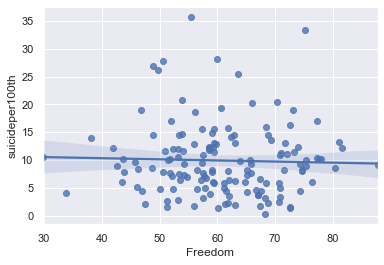

-0.03227696959068343


In [26]:
sns.regplot(x='Freedom', y='suicideper100th', data=freedom)
plt.show()
print(correlation(np.array(freedom['Freedom']), np.array(freedom['suicideper100th'])))

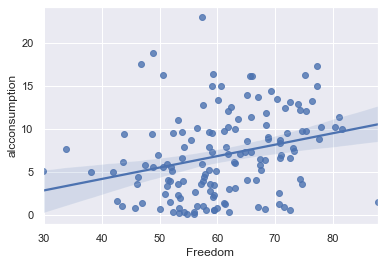

0.27633123545284194


In [23]:
sns.regplot(x='Freedom', y='alcconsumption', data=freedom)
plt.show()
print(correlation(np.array(freedom['Freedom']), np.array(freedom['alcconsumption'])))

Another measure of a country's economics is their spending on social safety nets and their welfare state capacity. In general, a stronger welfare steps prevents vunerable people from absolute poverty. The correlation between spending and suicide in 1st world countries can be explored. 

In [61]:
#Get data on social spending, and add a column representing total spending 

social = pd.read_csv('public_spending.csv')
social = social.dropna()
social['Total'] = social.drop('country', axis=1).sum(axis=1)

social = social.merge(incomedeath, left_on='country', right_on='country')
print(social.isnull().sum())

country                            0
Social Spending                    0
Pension Spending                   0
Public Unemployment Spending       0
Family Benefits Public Spending    0
Social Benefits to Households      0
Incapacity Spending                0
Labor Markets Spending             0
Total                              0
alcconsumption                     0
incomeperperson                    0
suicideper100th                    0
employrate                         0
urbanrate                          0
dtype: int64


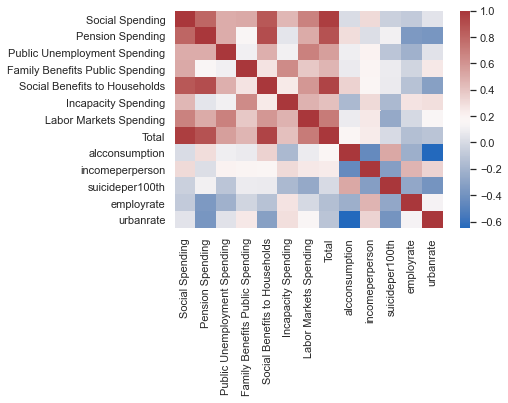

In [69]:
social_matrix = social.drop('country', axis=1)
sns.heatmap(social_matrix.corr(), cmap='vlag')
plt.show()

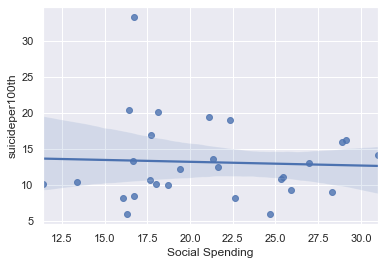

-0.046948523639748635


In [66]:
sns.regplot(x='Social Spending', y='suicideper100th', data=social)
plt.show()
print(correlation(np.array(social['Social Spending']), np.array(social['suicideper100th'])))

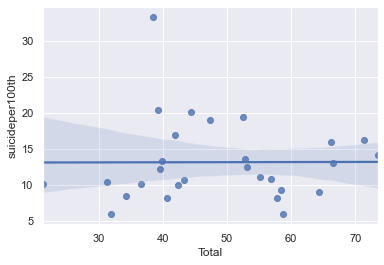

0.0035296280260191724


In [64]:
sns.regplot(x='Total', y='suicideper100th', data=social)
plt.show()
print(correlation(np.array(social['Total']), np.array(social['suicideper100th'])))

Since most suicides are done with firearms, we can explore the relationship between gun ownership and the suicide rates of every country

In [32]:
#Load the gun ownership dataset
guns = pd.read_csv('gun_ownership.csv')
guns = guns.sort_values('country')
guns = guns.merge(incomedeath, left_on='country', right_on='country')

#Remove outliers
guns = guns[guns['Guns per 100'] > 3]
guns = guns[guns['Guns per 100'] < 60]
guns = guns[guns['suicideper100th'] < 25]
print(guns.isnull().sum())

country            0
Guns per 100       0
alcconsumption     0
incomeperperson    0
suicideper100th    0
employrate         0
urbanrate          0
dtype: int64


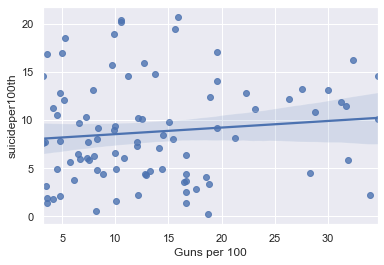

0.11202648707225771


In [33]:
sns.regplot(x='Guns per 100', y='suicideper100th', data=guns)
plt.show()
print(correlation(np.array(guns['Guns per 100']), np.array(guns['suicideper100th'])))

Most of the factors within the analysis did not show significant correlation to suicide. The total significance of every single factor to suicide rate can be finalized with a Linear Regression algorithm

In [140]:
#Get data on the factors explored in this statistical

freedom_ = pd.read_csv('freedom.csv')
social_ = pd.read_csv('public_spending.csv')
country2region_ = pd.read_csv('country2region.csv')

#Add NaNs for the countries that aren't in social_

for cont in np.array(freedom_['country']):
    if cont not in np.array(social_['country']):
        df1_list = [[np.nan] * len(social_.columns)]
        df1_list[0][0] = cont
        df1 = pd.DataFrame(df1_list, columns=social_.columns)
        social_ = df1.append(social_, ignore_index=True)

#Make a total csv file which consists of every single factor

total = social_.merge(freedom_)
total = total.merge(country2region_)

#Fill the NaNs with the means of every column, if possible

for col in total.columns:
    try:
        total[col] = total[col].fillna(np.mean(total[col]))
    except:
        continue

#Merge the total dataset with the data on suicides

total = total.merge(incomedeath)

#Vectorize the total dataset

for col in ['country', 'region', 'subregion']:
    total[col] = LabelEncoder().fit_transform(total[col])

#Fit the data with a Linear Regression Lasso algorithm

X = np.array(total.drop('suicideper100th', axis=1))
y = np.array(total['suicideper100th'])
model = Lasso()

scores = cross_val_score(model, X, y, cv=5)
print(scores.mean(), scores.std())

0.012553239124285121 0.11662143629020118
